# Evaluating Models (Default Parameters) with Cross-Validation

___
Prepared by [Ali Rifat Kaya](https://www.linkedin.com/in/alirifatkaya/)
___
Codes for the functions used in this notebook can be downloaded from [my_module.py](my_module.py) file.
* `pr_auc_score`
* `scoring_functions`
* `do_cross_validation`
* `plot_confusion_matrix`
* `plot_precision_recall_curve`
* `plot_roc_curve`
* `calculate_statistics`
* `make_df_statistics`
* `train_model`
* `test_model`
___

# Table of Contents

1. [Understanding the Research Question](#Understanding-the-Research-Question)
2. [Set of Algorithms](#Set-of-Algorithms)
3. [A Brief Introduction to Metrics](#A-Brief-Introduction-to-Metrics)
4. [Import Libraries & Read Data](#Import-Libraries-&-Read-Data)
5. [First Check on Metrics](#First-Check-on-Metrics)
6. [What is Cross-Validation?](#What-is-Cross-Validation?)
7. [ML Algorithms Spot Check](#ML-Algorithms-Spot-Check)
    * [Cross-Validation Results](#Cross-Validation-Results)
    * [Precision-Recall and ROC Plots](#Precision-Recall-and-ROC-Plots)
9. [Train-Test Models](#Train-Test-Models)
    * [Train the Models](#Train-the-Models)
    * [Test the Models](#Test-the-Models)
    * [Confusion Matrices](#Confusion-Matrices)
10. [Resampling the Data](#Resampling-the-Data)
    * [Cross-Validation Results with Resampled Data](#Cross-Validation-Results-with-Resampled-Data)
11. [Conclusion](#Conclusion)

# Understanding the Research Question

   The credit or debit card fraud is a daily life issue which causes a great number of people to suffer and a great amount of resources to be lost. It can happen to anyone in our society since our transactions are mostly done digitally.
   
   The below chart is from [The Nilson Report](https://nilsonreport.com/mention/407/1link/) where they focus on card fraud losses. The report projects that card fraud losses will reach 40 bil. \\$ in 2027. Even though, the cents per 100\\$ indicator begins to fall starting from 2015; the total card losses increases steadily year by year. That means by 2027 more people will be using (credit/debit) cards and people will make their payments mostly by cards.
   $$
   $$
<div>
     <img src="https://nilsonreport.com/upload/Cover_Chart_1164.gif", width=400, height=300/>
</div>

   In this project, my aim is to detect fraudulent card transactions by using machine learning tools. My goal is to catch all fraudulent transaction by keeping the customers safe and happy. However, there are a potential issues which are the misclassification of a fraudulent transaction (false negative) and a genuine transaction (false positive).
   
   In the case of a false negative, the fraud happens and bank lost resources. On the other hand, in the case of a false positive, the customer satisfaction will be negatively affected. For this reason, we aim to detect all possible fraudulent transactions as fraudulent and all genuine transactions as genuine. However, there will be a trade-off being fraud-proof and being naive to assume that all transactions are genuine. I will try to optimize the tools to find the sweet spot where all parties will face the least damage. Nevertheless, it is the utmost responsibility of the stakeholders to maintain the balance.

# Set of Algorithms

In this project I will employ the following machine learning algorithms:
* [Dummy Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) - It is in the list just for benchmarking purposes. It is not employed in the main classification process.
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Extra Trees Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
* [AdaBoost Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [XGBoost Classifier](https://xgboost.readthedocs.io/en/latest/index.html)

The [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) was intended to be included in the study; however, it does not an innate probability estimation. It does have a `probability=True` parameter which enables probability estimation. However, in the [user guide](https://scikit-learn.org/stable/modules/svm.html#scores-probabilities) it is expressed that
> in binary classification, a sample may be labeled by predict as belonging to the positive class even if the output of predict_proba is less than 0.5; and similarly, it could be labeled as negative even if the output of predict_proba is more than 0.5.

Another point is that enabling [`probability=True`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) is not computationally efficient since _it internally uses 5-fold cross-validation_. For these reason, Support Vector Classifier is not included to the study.

# A Brief Introduction to Metrics

Before I dive into the machine learning algorithms, I would like to give a brief information about the evaluation metrics that I used in this project.

In order to have a better understanding, I will start from the _Confusion Matrix_ which is the summary of the performance of an algorithm.
$$
$$
<div>
    <img src="https://i.ytimg.com/vi/AOIkPnKu0YA/maxresdefault.jpg", width=500, height=300/>
</div>

In the light of credit card fraud detection problem:
* __True Negative (TN)__: Transactions that are genuine and classified as genuine. 
* __False Negative (FP)__: Transactions that are fraudulent but classified as genuine. 
* __True Positive (TP)__: Transactions that are fraudulent and classified as fraudulent. 
* __False Positive (FP)__: Transactions that are genuine but classified as fraudulent. 

__Accuracy__: What percent of all transactions are classified correctly? 

__Precision__: What percent of transactions that are predicted to be fraudulent are classified correctly? 

__Recall (Sensitivity)__: What percent of (actual) fraudulent transactions are classified correctly? 

__Specificity__: What percent of (actual) genuine transactions are classified correctly? 

__F1 Score__: Weighted average of Recall and Precision. 

__F-$\beta$ Score__: Weighted average of the Recall and Precision. As $\beta$ increases it gives more weights to _False Negative_ (Precision) and as it decreases the metric gives more weight to _False Negatives_ (Recall). 

__Geometric Mean (G-Mean)__: Balances Sensitivity and Specificity by taking the square root of the multiplication of both. 

__Matthew Correlation Coefficient__: A measure of the quality of classifications. 

__ACUPR (Area Under Curve Precision-Recall)__: The area under the curve in the Precision (y-axis) - Recall (x-axis) plot.

__AUCROC (Area Under Curve Receiver Operating Characteristics)__: The area under the curve in the True Positive Rate (y-axis) - False Positive Rate (x-axis) plot.

For more information please visit the following links:
* [AUC vs Geometric Mean for Classifying Imbalanced Classification](https://stats.stackexchange.com/questions/235710/auc-geometric-mean-for-classifying-imbalanced-classes)
* [Tour of Evaluation of Metrics for Imbalanced Classification](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)
* [The Advantages of the Matthews Correlation Coefficient (MCC) over F1 Score and Accuracy in Binary Classification Evaluation](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7)
* [ROC Curves and Precision-Recall Curves for Imbalanced Classification](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/)
* [Saito & Rehmsmeier (2015)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)

# Import Libraries & Read Data

In [1]:
# import modules
from IPython.core.display import display, HTML
from my_module import *
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

# ignore warnings
warnings.filterwarnings('ignore')
# wider jupyter notebook
display(HTML('<style>.container { width:80% !important; }</style>'))

In [2]:
# reads data into a dataframe
raw_data = pd.read_csv('creditcard_new.csv', header=0)
# copy data into another dataframe by keeping the original safe
df = raw_data.copy()
# input matrix and target array
X = df.drop(['Class', 'Hours'], axis=1).values  # define the input matrix
y = df.Class.values  # the label array (classes)
# split the data into the training data (70%) and the test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [3]:
print(('Training data has {} fraudulent transactions.'.format(y_train.sum())))
print(('Test data has {} fradulent transactions.'.format(y_test.sum())))
print(('\nDistribution of positive class in training data: {}'.format(
    round((y_train[y_train == 1].size/y_train.size), 4))))
print(('Distribution of positive class in test data: {}'.format(
    round((y_test[y_test == 1].size/y_test.size), 4))))

Training data has 337 fraudulent transactions.
Test data has 128 fradulent transactions.

Distribution of positive class in training data: 0.0017
Distribution of positive class in test data: 0.0015


* We have the same approximately the positive class distribution both in the training and the test data.
* This will help us to have a stable performance of the evaluation metrics.
* Set the test set aside for final evaluation.

# First Check on Metrics

* The [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) will help us to explore which metrics are best for an extremely imbalanced data by comparing the results from DummyClassifier with the ones from LogisticRegression.
* The DummyClassifier does not consider the input matrix while predicting the class labels which means that it assigns labels randomly. It is a benchmark model which identifies a ‘junk’ model. If a does not beat the DummyClassifier, then that model doesn't worth investment. 
* The Dummy Classifier has the following strategies: `stratified`, `most_frequent`, `prior`, `uniform`, and `constant`. 
* The below table shows which strategy will be used for which metric to have the base performance results.

|Metric|Strategy|
|------|--------|
|Accuracy|most_frequent|
|Precision|stratified|
|Recall|stratified|
|Specificity|stratified|
|F1 Score|constant|
|F2 Score|constant|
|Geometric Mean (G-Mean)|uniform|
|Matthew Correlation Coefficient|stratified|
|AUCPR|stratified|
|AUCROC|stratified|

##Calculating DummyClassifier Scores
* Here, I used a 3-fold cross validation which is not necessary since the classification process is random.
* However, I did not want to `.fit` and `.predict` for each strategy of DummyClassifier so that I used `do_cross_validation` function.
* The CV process does not hurt since it actually makes no difference for DummyClassifier

In [4]:
# metric names for index of dataframe
metrics = [
    'accuracy_score', 'precision_score', 'recall_score', 'specificity_score',
    'f1_score', 'f2_score', 'geometric_mean_score', 'matthews_corrcoef',
    'roc_auc_score', 'pr_auc_score'
]

In [5]:
# genarate a cross-validation object
# does the cross-validation 5 times by using
# stratified folds - keeps the ratio of samples for each class.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# stategies of DummyClassifier
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']
dummy_models = []  # stores DummyClassifier objects
# generates DummyClassifier objects
for strategy in strategies:
    if strategy == 'constant':
        # constant strategy predicts each datapoint as fraudulent
        dummy_models.append(DummyClassifier(strategy=strategy, constant=1))
    else:
        dummy_models.append(DummyClassifier(strategy=strategy))
# a list of tuples such as ('model_name', model)
dummy_models = list(zip(strategies, dummy_models))
# a list of scalers
scalers = [False] * 5
# calculates cv scores
cvresults = do_cross_validation(X_train,
                                y_train,
                                dummy_models,
                                cv,
                                scalers=scalers,
                                prints=False)
mean_scores, _ = calculate_statistics(cvresults)
df_firstcheck = pd.DataFrame(mean_scores)
df_firstcheck['metrics'] = metrics
df_firstcheck.set_index('metrics', inplace=True)
df_firstcheck.index.name = None
# making sense from dummy scores based on above table
df_firstcheck = {
    'DummyClassifier': {
        'accuracy_score':
        df_firstcheck.loc['accuracy_score', 'most_frequent'],
        'precision_score':
        df_firstcheck.loc['precision_score', 'stratified'],
        'recall_score':
        df_firstcheck.loc['recall_score', 'stratified'],
        'specificity_score':
        df_firstcheck.loc['specificity_score', 'stratified'],
        'f1_score':
        df_firstcheck.loc['f1_score', 'constant'],
        'f2_score':
        df_firstcheck.loc['f2_score', 'constant'],
        'geometric_mean_score':
        df_firstcheck.loc['geometric_mean_score', 'uniform'],
        'matthews_corrcoef':
        df_firstcheck.loc['matthews_corrcoef', 'stratified'],
        'roc_auc_score':
        df_firstcheck.loc['roc_auc_score', 'stratified'],
        'pr_auc_score':
        df_firstcheck.loc['pr_auc_score', 'stratified']
    }
}
df_firstcheck = pd.DataFrame(df_firstcheck)  # turns dict into dataframe
df_firstcheck = df_firstcheck.loc[metrics, :]  # sort index
df_firstcheck  # shows dataframe

,DummyClassifier
accuracy_score,0.998299
precision_score,0.005076
recall_score,0.005926
specificity_score,0.998180
f1_score,0.003397
f2_score,0.008449
geometric_mean_score,0.501467
matthews_corrcoef,0.003729
roc_auc_score,0.500638
pr_auc_score,0.004007


##Calculating LogisticRegression Scores

In [6]:
# define the model
models = [('LogisticRegression', LogisticRegression())]
# get cross validation scores
cv_results = do_cross_validation(X_train,
                                 y_train,
                                 models,
                                 cv,
                                 scalers=[True],
                                 prints=False)
# calculates mean cross validation scores
mean_scores, _ = calculate_statistics(cv_results)
# gets mean scores from the dictionary using 'LogisticRegresion' key
mean_scores = mean_scores['LogisticRegression']
# adds LogisticRegression results to the dataframe
df_firstcheck['LogisticRegression'] = mean_scores
# shows data frame
df_firstcheck

,DummyClassifier,LogisticRegression
accuracy_score,0.998299,0.999152
precision_score,0.005076,0.852547
recall_score,0.005926,0.608297
specificity_score,0.998180,0.999818
f1_score,0.003397,0.709103
f2_score,0.008449,0.644837
geometric_mean_score,0.501467,0.779562
matthews_corrcoef,0.003729,0.719282
roc_auc_score,0.500638,0.967877
pr_auc_score,0.004007,0.755891


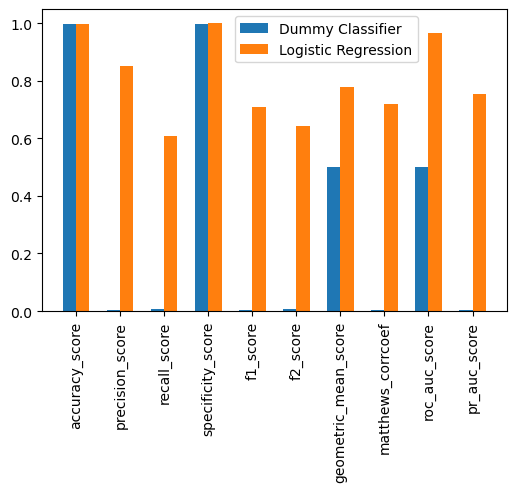

In [7]:
fig, ax = plt.subplots()  # generates figure and axis objects
fig.set_dpi(100)  # set the resolution of the plot
width = 0.3  # width of the bars
idx = np.arange(df_firstcheck.shape[0])  # location of the bars
# first bar plot - scores of the DummyClassifier
ax.bar(idx, df_firstcheck['DummyClassifier'], width)
# second bar plot - scores of the Logistic Regression
ax.bar(idx+width, df_firstcheck['LogisticRegression'], width)
ax.legend(['Dummy Classifier', 'Logistic Regression'],
          bbox_to_anchor=(0.40, 0.8))  # legend - contains labels
# set the number and position of ticks on x-axis
ax.set_xticks(np.arange(df_firstcheck.shape[0])+0.15)
# labels for ticks on x-axis
ax.set_xticklabels(df_firstcheck.index, rotation=90)
plt.show()  # shows the plot

* In the above figure we see the performance of `DummyClassifier` and `LogisticRegression` for several evaluation metrics.
* The first thing is that __Accuracy__ and __Specificity__ are not good evaluation metrics, because a dummy algorithm can perform nearly the perfect score. The reason is that data is extremely imbalanced so that the `DummyClassifier` algorithm labels each data point as negative - genuine transactions.
* The second thing is that the gap between __Precision__ and __Recall__. While the former tells us 'What percent of predicted fraudulent transactions are classified correctly?'; the latter tells us 'What percent of (actual) fraudulent transactions are classified correctly?'. Even though, they are both concern about the fraudulent transactions, I would like to put more weight on __Recall__ since it is an important task to catch as much fraudulent transactions as possible.
* The third thing is that we observe the above pattern in the hybrid metrics such as __F1 Score__, __F2 Score__ and __Geometric Mean__. The first two hybrid metrics (__F1/F2 Scores__) are based on __Precision__ and __Recall__ and the last one (__Geometric Mean__) is based on __Specificity__ and __Sensitivity__ (__Recall__). Since __Specificity__ has a higher score than __Precision__, the __Geometric Mean__ is higher than both of __F1/F2 Scores__.
* When the nature of data (being extremely imbalanced) and the above discussion points are taken into consideration, for now, I believe that it is best to continue with __Matthews CC__, __AUCPR__ and __AUCROC__. There will be another discussion after all models are tested.

# What is Cross-Validation?

* I want to explain the Cross-Validation process briefly. Due to the limited amount of data, data scientist may not train their model in a separate data and test the models with a brand new data. At least in my case, I have 2 days of transactions to train and test the models. For this reason, I used the Cross-Validation by keeping a part of my data (holdout sample) for testing purposes - as a brand new data and train and test (validation) the models with the the other half of the data.
* The below figure explains the Cross-Validation process visually:
$$
$$
<div>
    <img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png", width=500, height=300>
</div>
$$
$$
* In my case, I used 70% of the data for training and 30% of the data for testing purposes. By using a 5-fold Cross-Validation, I used $1/5$ of the training data for validation purposes.
* In each iteration,I will train the model from scratch so the the results are independent.
* Cross-Validation let us to reduce the impact of _luck_ in our studies by training and testing the models from scratch with different parts of data and getting an interval for the future results.

# ML Algorithms Spot-Check

## Cross-Validation Results

In [8]:
# define objects - lm algorithms
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
# (model_name, model, scaling)
estimators_all = [('Logistic Regression', lr), ('Naive Bayes', nb),
                  ('KNN Classifier', knn), ('Decision Tree Classifier', dt),
                  ('Random Forest Classifier', rf),
                  ('Extra Trees Classifier', et), ('AdaBoost Classifier', ada),
                  ('Gradient Boosting Classifier', gb),
                  ('XGBoost Classifier', xgb)]
scalers_all = [True, False, True, False, False, False, False, False, False]
# cross-validation
prints = True  # prints out information about each fold
cv_results = do_cross_validation(X=X_train,
                                 y=y_train,
                                 estimators=estimators_all,
                                 cv=cv,
                                 scalers=scalers_all,
                                 prints=True)

Fold 1:

Number of Observations in the Training Data: 158469
Number of Observations in the Validation Data: 39618:

Logistic Regression
---------------------------------------------------------------------------------
Training data AUCPR score: 0.7621031823637123
Validation data AUCPR score: 0.7506352970905099

Training data AUCROC score: 0.9792534977605873
Validation data AUCROC score: 0.9738049379043654
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
40 out of 44 predicted fraudulent transactions are true fraudulent transactions


Naive Bayes
---------------------------------------------------------------------------------
Training data AUCPR score: 0.32835753539345636
Validation data AUCPR score: 0.33200796581588493

Training data AUCROC score: 0.9683894792249236
Validation data AUCROC score: 0.9728385513497434
---------------------------------------------------------------------------------


Gradient Boosting Classifier
---------------------------------------------------------------------------------
Training data AUCPR score: 0.7044076205716022
Validation data AUCPR score: 0.6853792462705546

Training data AUCROC score: 0.8491083119104799
Validation data AUCROC score: 0.874586710790511
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
45 out of 63 predicted fraudulent transactions are true fraudulent transactions


XGBoost Classifier
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.8708708545958965

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.9700282590912472
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
54 out of 59 predicted fraudulent transactions are true fraudulent trans


Extra Trees Classifier
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.8208553682784479

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.9528790308885408
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
45 out of 47 predicted fraudulent transactions are true fraudulent transactions


AdaBoost Classifier
---------------------------------------------------------------------------------
Training data AUCPR score: 0.8457299702125058
Validation data AUCPR score: 0.6982217997919908

Training data AUCROC score: 0.9990878868754975
Validation data AUCROC score: 0.9878385568994472
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
43 out of 57 predicted fraudulent transactions are true fraudulent transacti

In [9]:
# results as a pickle file
pickle.dump(cv_results, open('cv_results.pickle', 'wb'))
# calculates mean and standard deviation for cross validation scores
mean_scores, std_devs = calculate_statistics(cv_results)
# puts the mean scores in a dataframe
df_mean = make_df_statistics(mean_scores)
# puts the standard deviations in a dataframe
df_std = make_df_statistics(std_devs)
df_stats = df_mean.merge(df_std, left_index=True, right_index=True, suffixes=(
    '_mean', '_std'))  # merge mean and standard deviations dataframes
df_stats

,matthews_corrcoef_mean,roc_auc_score_mean,pr_auc_score_mean,matthews_corrcoef_std,roc_auc_score_std,pr_auc_score_std
Logistic Regression,0.719282,0.967877,0.755891,0.028513,0.012395,0.028631
Naive Bayes,0.298440,0.965817,0.331273,0.021472,0.009326,0.036603
KNN Classifier,0.824785,0.919728,0.852010,0.023925,0.022877,0.033320
Decision Tree Classifier,0.744170,0.881013,0.745941,0.055447,0.040143,0.054938
Random Forest Classifier,0.859027,0.943637,0.854041,0.030563,0.011255,0.028008
Extra Trees Classifier,0.850278,0.956764,0.859419,0.027048,0.013798,0.032587
AdaBoost Classifier,0.732488,0.969976,0.760508,0.046935,0.010269,0.051645
Gradient Boosting Classifier,0.661459,0.746732,0.602662,0.174120,0.201380,0.197956
XGBoost Classifier,0.848954,0.975323,0.850352,0.040524,0.004999,0.028412


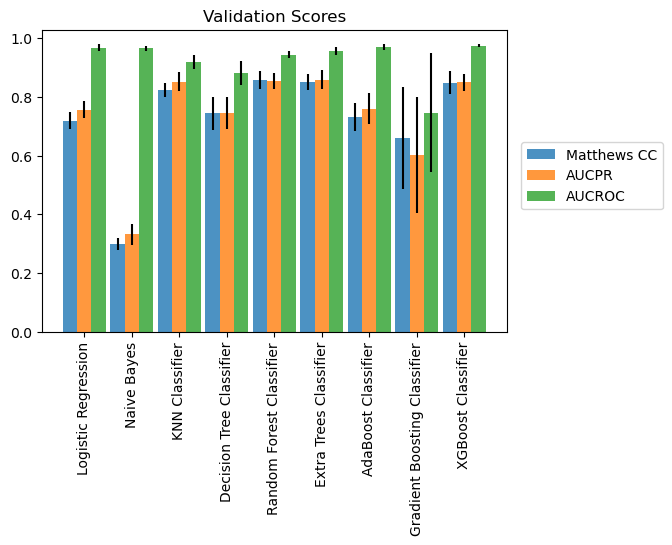

In [10]:
fig, ax = plt.subplots()  # generates figure and axes object
fig.set_dpi(100)  # set the resolution of the plot
width = 0.3  # set bar width
idx = np.arange(
    df_stats.shape[0])  # number of ticks for x-axis and bar location
ax.bar(idx, df_stats.matthews_corrcoef_mean, width,
       yerr=df_stats.matthews_corrcoef_std, align='center',
       alpha=0.8, ecolor='black')  # plots matthews correlation coef.
ax.bar(idx + width, df_stats.pr_auc_score_mean, width,
       yerr=df_stats.pr_auc_score_std, align='center',
       alpha=0.8, ecolor='black')  # plots AUCPR
ax.bar(idx + 2*width, df_stats.roc_auc_score_mean, width,
       yerr=df_stats.roc_auc_score_std, align='center',
       alpha=0.8, ecolor='black')  # plots AUCROC
ax.set_xticks(idx + 0.3)  # adjust the position of xticks
ax.set_xticklabels(df_stats.index, rotation=90)  # changes the tick labels
ax.legend(['Matthews CC', 'AUCPR', 'AUCROC'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Validation Scores')
plt.show()  # shows the plot

* The first point is that __Matthews CC__ and __AUCPR__ are pretty close to each other regardless of the algorithm; except for Naive Bayes.
* The second point is that all algorithms performed well with respect to __AUCROC__ which is kind of suspicious when we look at __Matthews CC__ and __AUCPR__.
* __Gradient Boosting Classifier__ has the highest error which means its scores varies in a large interval. However, this is not a desired outcome.
* __Naive Bayes__ has one of the highest __AUCROC__ scores but it does not consistent with __Matthews CC__ and __AUCPR__ when compared with other models.
* Another point is, as discussed in [A Brief Introduction to Metrics](#A-Brief-Introduction-to-Metrics), __ROC__ score may report optimistic results under the condition of extreme class imbalance. I believe that __AUCROC__ scores reflects that optimism so that the highest score for each model is __AUCROC__ score. This can be verified by examining the print outs of cross-validation process.
* __AUCROC__ has the least standard deviation which means it is the most consistent metric. However, I believe that it comes from the optimism we have discussed. For this reason, __AUCROC__ may not be a reliable metric.
* As a result, both __Naive Bayes__ and __Gradient Boosting Classifier__ are discarded from the study. Moreover, __AUCROC__ will also be excluded from the study.
* I will report the __Precision-Recall Curve__ and __Receiver Operating Curve__ for each algorithm.

## Precision-Recall and ROC Plots

In [11]:
#cv_results = pickle.load(open('cross_val_scores.pickle', 'rb'))

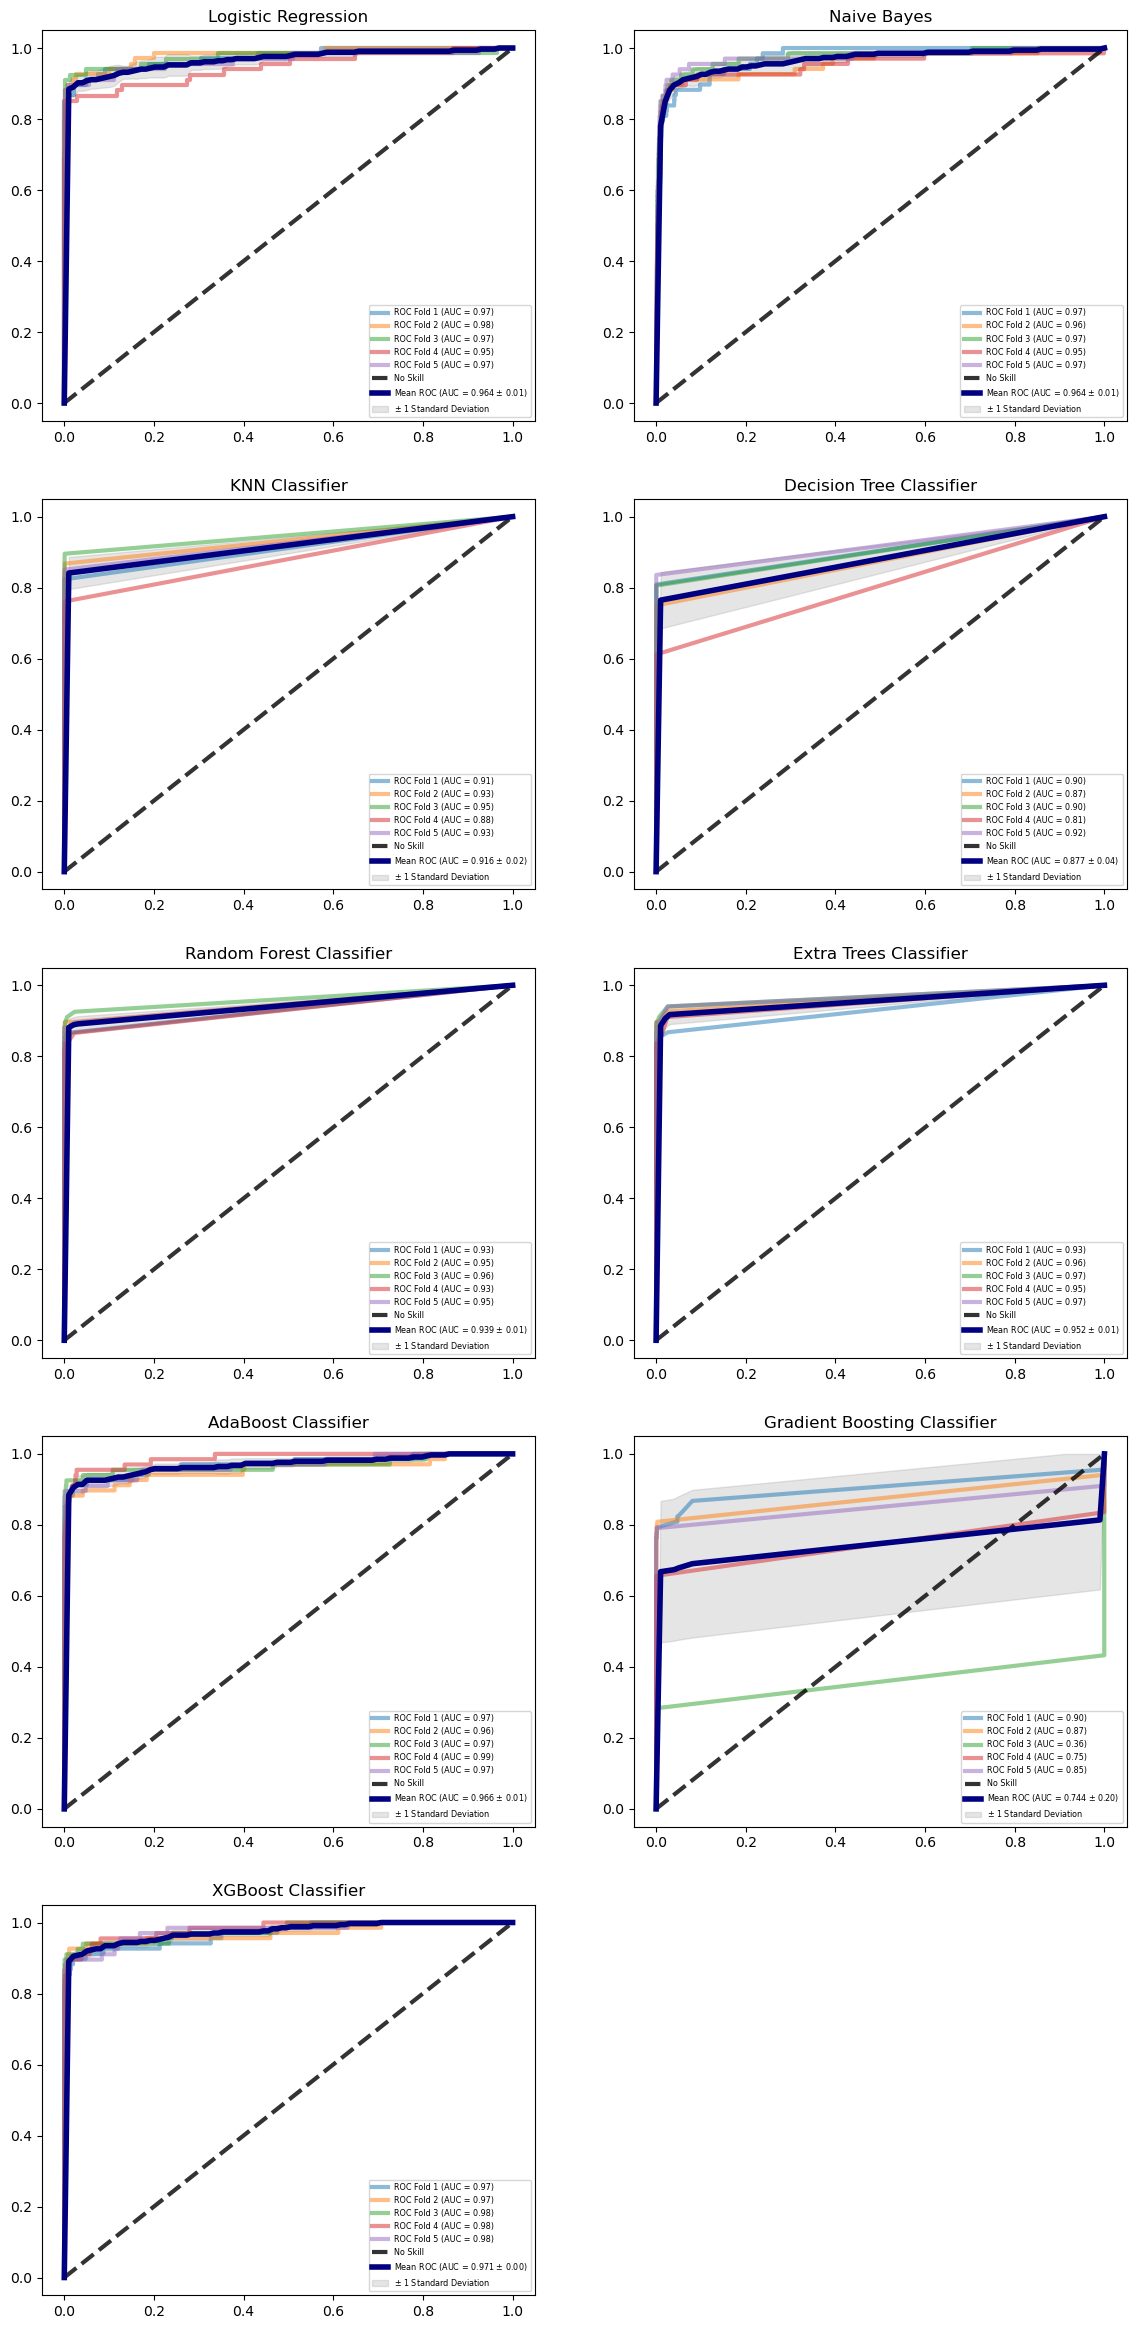

In [12]:
# plot for roc curves - 10 subplots
fig, axes = plt.subplots(5, 2, figsize=(14, 30))
fig.set_dpi(100)  # set the resolution of the plot
axes = axes.ravel()  # flattens the axes list
# plots roc curves
for idx, (model, results) in enumerate(cv_results.items()):
    plot_roc_curve(results['fprs'],
                   results['tprs'], title=model, ax=axes[idx])
fig.delaxes(axes[9])
plt.show()

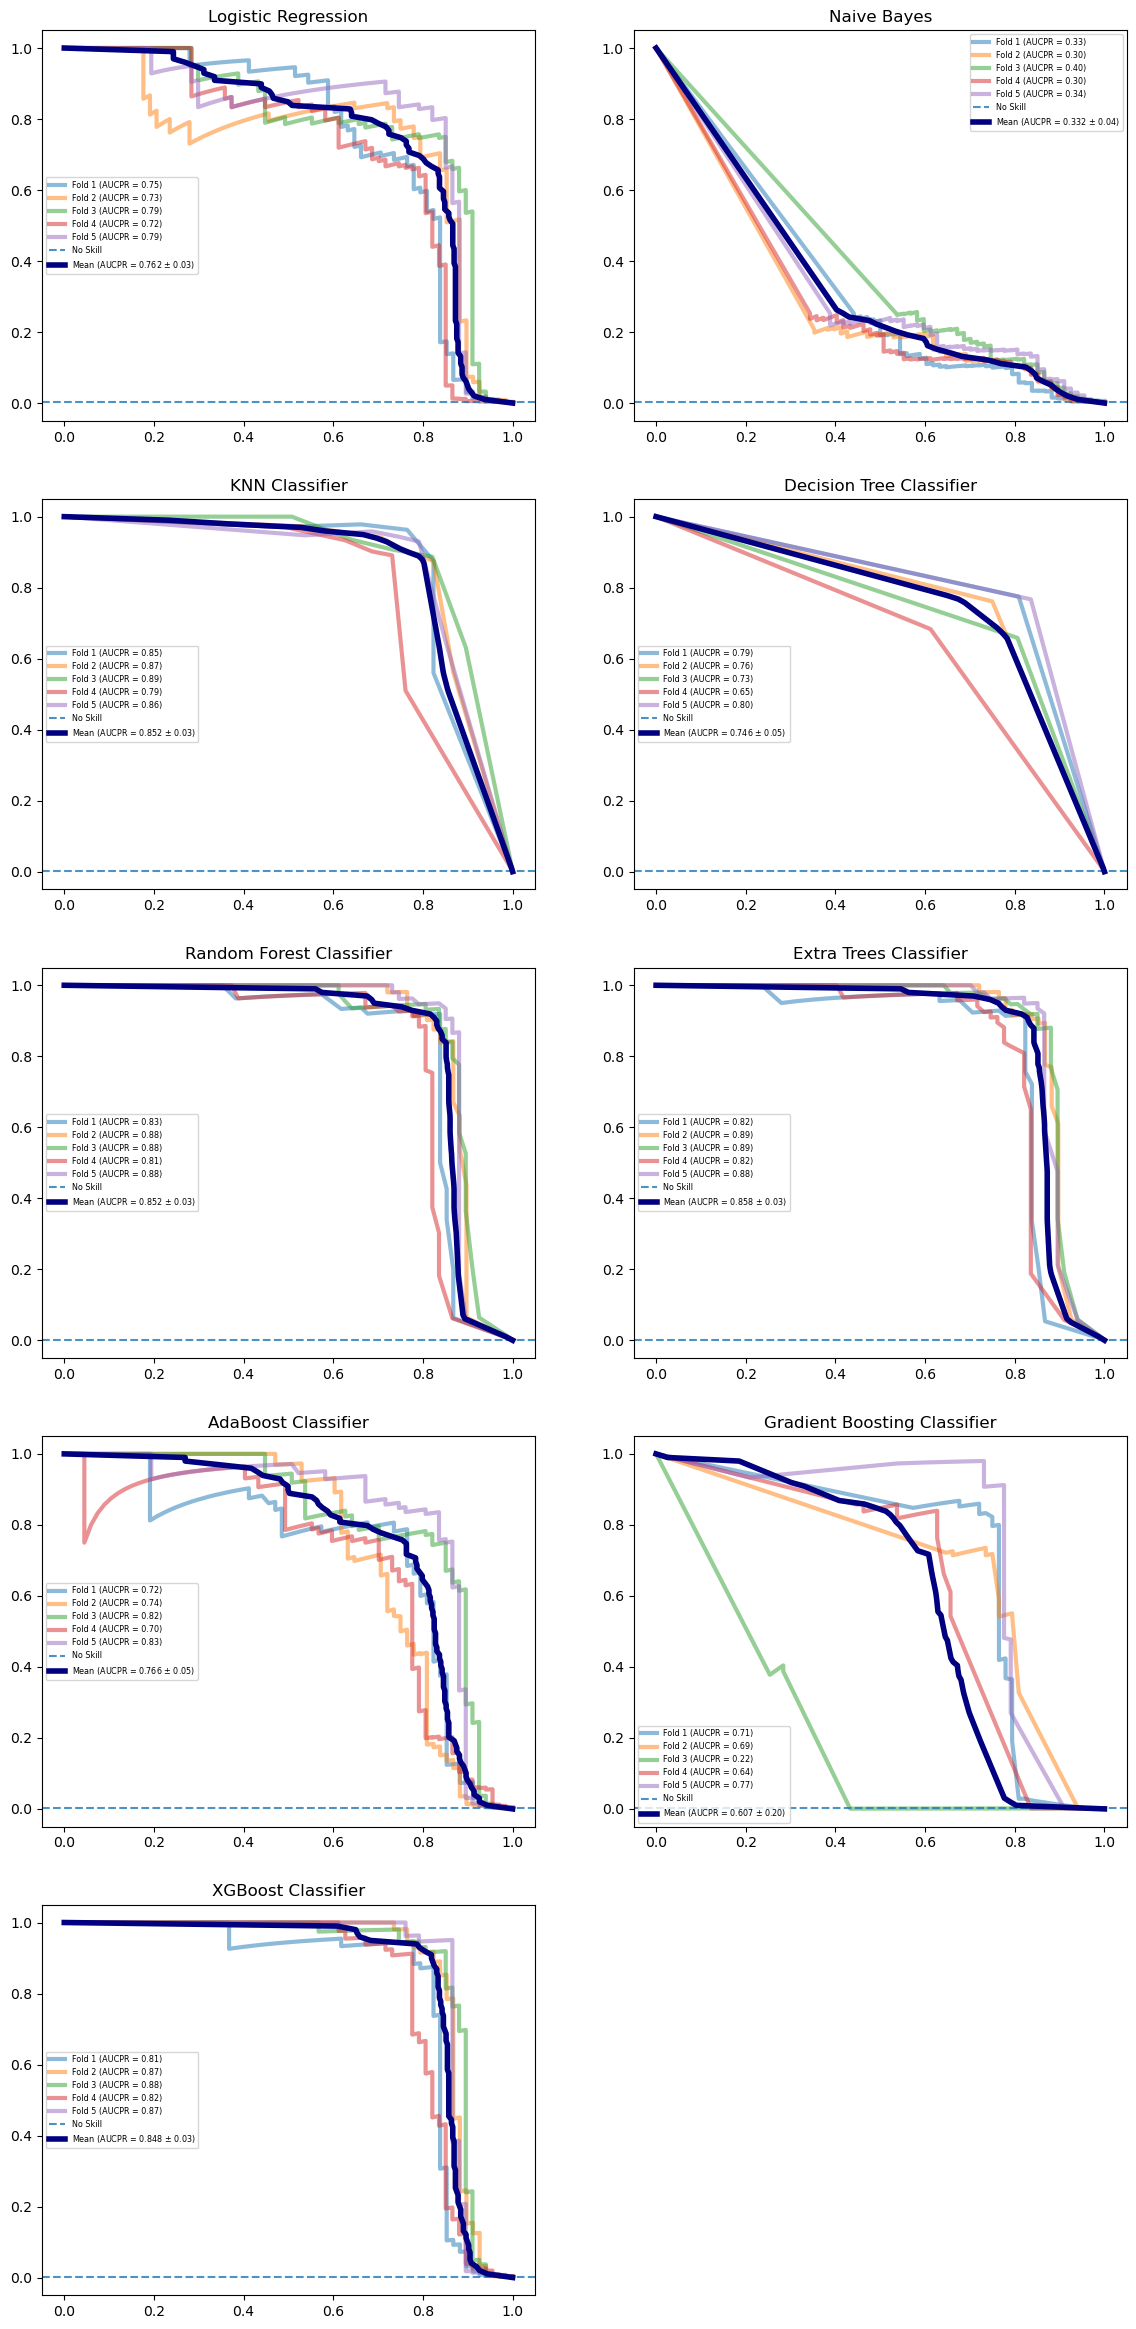

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(14, 30))
fig.set_dpi(100)
axes = axes.ravel()
for idx, (model, results) in enumerate(cv_results.items()):
    plot_precision_recall_curve(y_train, results['precisions'],
                                results['recalls'], title=model, ax=axes[idx])
fig.delaxes(axes[9])
plt.show()

# Train-Test Models

## Train the Models

In [14]:
# define objects - lm algorithms
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier()
# (model_name, model, scaling)
estimators_good = [('Logistic Regression', lr),
                   ('KNN Classifier', knn),
                   ('Decision Tree Classifier', dt),
                   ('Random Forest Classifier', rf),
                   ('Extra Trees Classifier', et),
                   ('AdaBoost Classifier', ada),
                   ('XGBoost Classifier', xgb)]
scalers_good = [True, True, False, False, False, False, False]
# train models
training_scores = train_model(
    estimators=estimators_good, X=X_train, y=y_train, scalers=scalers_good)
training_scores_, _ = calculate_statistics(training_scores)
df_training = make_df_statistics(training_scores_)
df_training

,matthews_corrcoef,roc_auc_score,pr_auc_score
Logistic Regression,0.733000,0.978098,0.770005
KNN Classifier,0.862655,0.999918,0.961044
Decision Tree Classifier,1.000000,1.000000,1.000000
Random Forest Classifier,1.000000,1.000000,1.000000
Extra Trees Classifier,1.000000,1.000000,1.000000
AdaBoost Classifier,0.778817,0.998818,0.835207
XGBoost Classifier,1.000000,1.000000,1.000000


## Test the Models

In [15]:
test_scores = test_model(estimators=estimators_good,
                         X=X_test, y=y_test, scalers=scalers_good)
test_scores_, _ = calculate_statistics(test_scores)
df_test = make_df_statistics(test_scores_)
df_test

,matthews_corrcoef,roc_auc_score,pr_auc_score
Logistic Regression,0.701298,0.967966,0.724175
KNN Classifier,0.845124,0.906128,0.843538
Decision Tree Classifier,0.719272,0.874746,0.720512
Random Forest Classifier,0.857865,0.935696,0.812826
Extra Trees Classifier,0.866544,0.939164,0.816161
AdaBoost Classifier,0.719188,0.972236,0.727773
XGBoost Classifier,0.857487,0.976248,0.819320


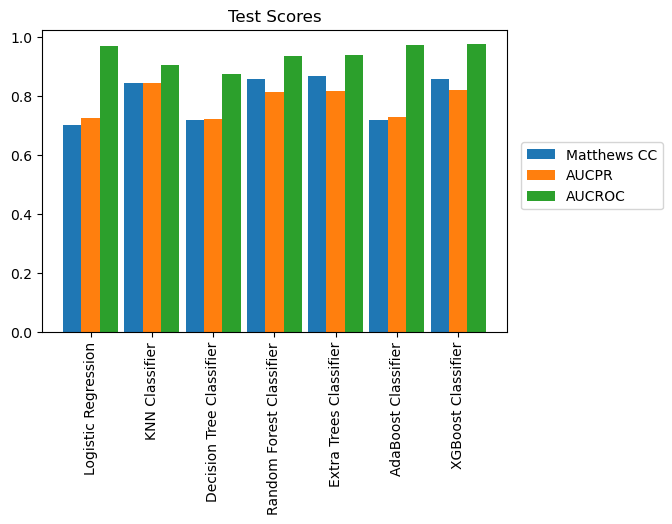

In [16]:
fig, ax = plt.subplots()  # generates figure and axes object
fig.set_dpi(100)  # set the resolution of the plot
width = 0.3  # set bar width
idx = np.arange(
    df_test.shape[0])  # number of ticks for x-axis and bar location
# plots matthews correlation coef.
ax.bar(idx, df_test.matthews_corrcoef, width)
ax.bar(idx + width, df_test.pr_auc_score, width)  # plots AUCPR
ax.bar(idx + 2 * width, df_test.roc_auc_score, width)  # plots AUCROC
ax.set_xticks(idx + 0.3)  # adjust the position of xticks
ax.set_xticklabels(df_test.index, rotation=90)  # changes the tick labels
ax.legend(['Matthews CC', 'AUCPR', 'AUCROC'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Test Scores')
plt.show()  # shows the plot

## Confusion Matrices

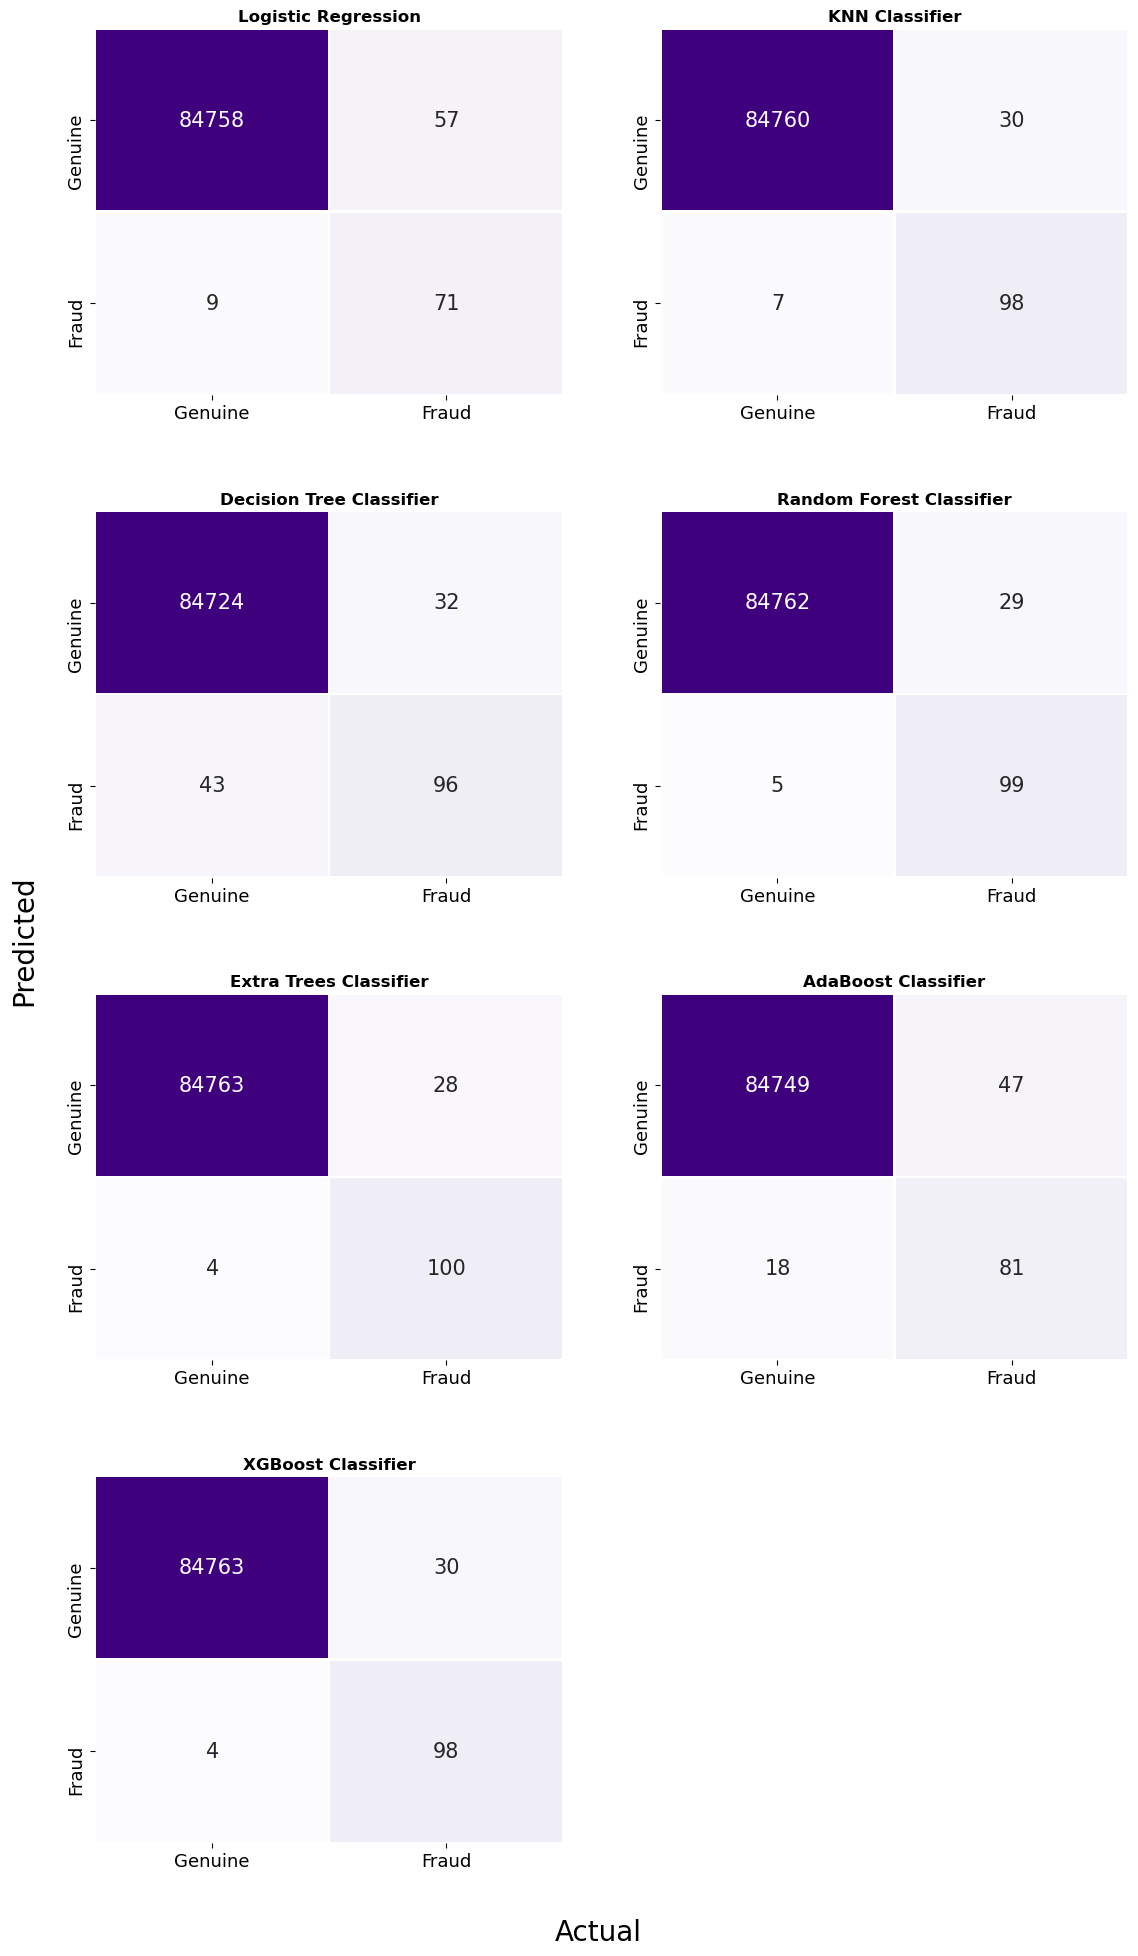

In [17]:
predicted_values_all = []
for model in df_test.index:
    predicted_values_all.append(test_scores[model]['predictions'][0])

fig, axes = plt.subplots(4, 2, figsize=(12, 20))
fig.set_dpi(100)
axes = axes.ravel()

for idx, model in enumerate(df_test.index):
    plot_confusion_matrix(
        y=y_test, predictions=predicted_values_all[idx], title=model, ax=axes[idx], cmap='Purples', cbar=False)
fig.text(0.5, 0, 'Actual', ha='center', size=20)
fig.text(0.01, 0.5, 'Predicted', va='center', size=20, rotation='vertical')
fig.delaxes(axes[7])
plt.tight_layout(5)
plt.show()

* In the above confusion matrices, the quality of the classification can be seen. It is also color-coded which means that the greater the number of transactions in a square the darker the color is. 
* The right bottom square gives the number of true positives which are the correctly classified fraudulent transactions. Also the left upper square gives the number of true negatives which are the correctly classified genuine transactions.
* I look for the best algorithms to continue with next step (hyperparameter optimization) which further improve the algorithms. For this reason, I look for the left upper and right bottom squares to have the greatest number of transactions but the other two squares to have nearly 0 transactions.
* The following algorithms show great performance (not in order of performance)
    * KNN Classifier
    * Decision Tree Classifier
    * Random Forest Classifier
    * Extra Tree Classifier
    * XGBoost Classifier
* All these algorithms have very close number of true positive classification. However, it is important to take the false positives (transactions that are fraudulent but classified as genuine transactions) and false negatives (transactions that are genuine but classified as fraudulent transactions). With a second look to the confusion matrices, it is seen that the following are the best (in order of performance):
    1. Extra Tree Classifier
    2. XGBoost Classifier
    3. Random Forest Classifier
    4. KNN Classifier
* After the resampling process, I will compare the results with the test scores to see if resampling improved algorithm performance.
* Let's continue after the resampling is done.

# Resampling the Data

Interested readers can refer the following resources and much more:
* [Imblearn Offical API](https://imbalanced-learn.readthedocs.io/en/stable/api.html)
* [Undersampling algorithms for imbalanced classification](https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/)
* [Combine oversampling and undersampling for imbalanced classification](https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/)
* [Balancing training data](https://www.inf.ufrgs.br/maslab/pergamus/pubs/balancing-training-data-for.pdf)

## Cross-Validation Results with Resampled Data

In [18]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [19]:
# combined sampling method - deletes observations from the majority class and
# increase the number of observations in the minority class at the same time
# in order to improve class distribution
resampling = SMOTEENN(
    enn=EditedNearestNeighbours(sampling_strategy='majority'), random_state=1)
# put them all in a list
resample = [('SMOTEENN', resampling)]
# cross-validate the models
cv_results_resample = do_cross_validation(X=X_train,
                                          y=y_train,
                                          estimators=estimators_all,
                                          cv=cv,
                                          resample=resample,
                                          scalers=scalers_all)

Fold 1:

SMOTEENN
---------------------------------------------------------------------------------
Number of transactions in the original training dataset: 158469
Number of transactions in the resampled training dataset: 302972
---------------------------------------------------------------------------------
Number of Fraudulent Transactions in the original training dataset: 269
Number of Fraudulent Transactions in the resampled training dataset 158200

Logistic Regression with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9982859028381387
Validation data AUCPR score: 0.4413748352387573

Training data AUCROC score: 0.9979910217733534
Validation data AUCROC score: 0.9205534691752806
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
68 out of 37550 predicted fraudulent transactions are true fraudulent transactions


Naive Ba


Extra Trees Classifier with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.8626615501944965

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.9581676210307133
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
58 out of 69 predicted fraudulent transactions are true fraudulent transactions


AdaBoost Classifier with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9995703727320332
Validation data AUCPR score: 0.7957972134999766

Training data AUCROC score: 0.9995276466937847
Validation data AUCROC score: 0.9712748196623782
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
61 out of 355 predicted fraudulent transactions 


Naive Bayes with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9891014768602975
Validation data AUCPR score: 0.32726644052536186

Training data AUCROC score: 0.9876257046206689
Validation data AUCROC score: 0.9546625280676264
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
42 out of 292 predicted fraudulent transactions are true fraudulent transactions


KNN Classifier with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.457286113386117

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.7665481064965941
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
63 out of 17798 predicted fraudulent transactions are true frau


Gradient Boosting Classifier with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 0.999675193941903
Validation data AUCPR score: 0.8060184402348848

Training data AUCROC score: 0.9997150562430899
Validation data AUCROC score: 0.9578342170311527
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
60 out of 231 predicted fraudulent transactions are true fraudulent transactions


XGBoost Classifier with SMOTEENN
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9999999999999999
Validation data AUCPR score: 0.8884778449033791

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.9518093476989263
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
57 out of 66 predicted fraud

In [20]:
pickle.dump(cv_results_resample, open('cv_results_resample.pickle', 'wb'))

In [21]:
resample_mean, resample_std = calculate_statistics(cv_results_resample)
df_resample = make_df_statistics(resample_mean)
df_resample

,matthews_corrcoef,roc_auc_score,pr_auc_score
Logistic Regression_SMOTEENN,0.007094,0.829597,0.463578
Naive Bayes_SMOTEENN,0.334515,0.967661,0.371186
KNN Classifier_SMOTEENN,0.043604,0.791306,0.465125
Decision Tree Classifier_SMOTEENN,0.564686,0.875964,0.589653
Random Forest Classifier_SMOTEENN,0.846653,0.963631,0.847032
Extra Trees Classifier_SMOTEENN,0.852602,0.968104,0.858380
AdaBoost Classifier_SMOTEENN,0.354774,0.965969,0.794086
Gradient Boosting Classifier_SMOTEENN,0.476427,0.971318,0.730261
XGBoost Classifier_SMOTEENN,0.834558,0.971031,0.849670


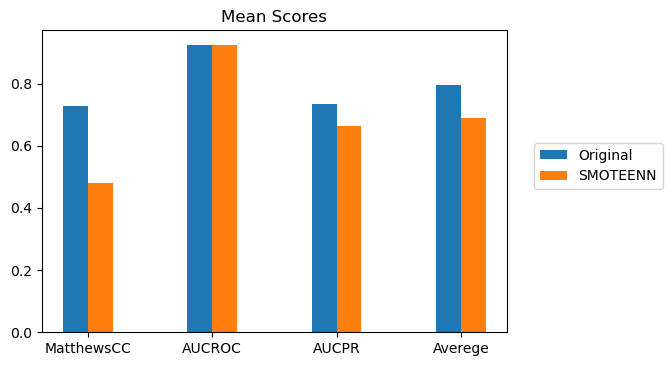

In [22]:
mean_smoteenn = df_resample.mean(axis=0).values
mean_smoteenn = np.append(mean_smoteenn, mean_smoteenn.mean())
mean_cv = df_stats.iloc[:, 0:3].mean(axis=0).values
mean_cv = np.append(mean_cv, mean_cv.mean())

fig, ax = plt.subplots()  # generates figure and axes object
fig.set_dpi(100)  # set the resolution of the plot
width = 0.2  # set bar width
idx = np.arange(mean_cv.shape[0])  # number of ticks for x-axis and bar location
ax.bar(idx, mean_cv, width)  # plots matthews correlation coef.
ax.bar(idx + width, mean_smoteenn, width)  # plots AUCROC
ax.set_xticks(idx+0.1)  # adjust the position of xticks
ax.set_xticklabels(['MatthewsCC', 'AUCROC', 'AUCPR', 'Averege']
                   )  # changes the tick labels
ax.legend(['Original', 'SMOTEENN'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Mean Scores')
plt.show()  # shows the plot

# Conclusion

__1-) Cross-Validation and Test Scores__

In the light of the [A Brief Introduction to Metrics](#A-Brief-Introduction-to-Metrics), [Test Scores](#Test-the-Models) and [Confusion Matrices](#Confusion-Matrices):
* The __AUCROC__ scores are higher than __MatthewsCC__ and __AUCPR__ scores in all cases. This, by itself, is not a sign for inflated scores in __AUCROC__. However, when __Naive Bayes__ scores are taken into consideration, both in cross-validation and resampled cross-validation, __AUCROC__ score is much higher, and one of the best scores, than __MatthewsCC__ and __AUCPR__; even though the classifier's performance is the worst. 
* Gradient Boosting Classifier has higher test scores than validation scores which is not an expected scenario. This is most probably due to the extremely imbalanced class distribution and the limited number of data points for the positive class.
* The [Confusion Matrices](#Confusion-Matrices) summarizes the performance of an estimator. If two estimators have approximately same __AUC__ (Area Under Curve) scores than it is expected that they will show similar performances which will be shown using Confusion Matrices.
    * For example; in [Test Scores](#Test-the-Models), __Logistic Regression__, __AdaBoost Classifier__ and __XGBoost Classifier__ have approximately same __AUCROC__ score while the story is different than expected on the side of Confusion Matrices.
    * Not only __XGBoost Classifier__ detected $30\%$ and $21\%$ more true fraudulent transactions but also it has $1.5\text{-times}$  and $3.5\text{-times}$ better performance in terms of false positives (the transactions that are genuine but classified as fraudulent) than __Logistic Regression__ and __AdaBoost Classifier__, respectively.
    * On the other hand __Extra Trees Classifier__ and __XGBoost Classifier__ have pretty close __Matthews CC__ and __AUCPR__; however __XGBoost Classifier__ beats __Extra Tree Classifier__ in terms of __AUCROC__ score. Nevertheless, the Confusion Matrices tells a different story which they both have approximately same number of transaction in each section of it.

   
__2-) Resample: SMOTEENN__

The credit card fraud detection, by the nature of the industry, has much less fraudulent transactions than genuine transactions. For this reason, the machine learning algorithms can have issues to identify patterns that can distinguish fraudulent transactions. Resampling methods help to change the class distribution in a dataset in order to better train the models and get better test results.

In this dataset, I applied `SMOTEENN` to reample the dataset which means it increases the number of fraudulent transactions by synthetic data points with `SMOTE`. It first equals the class distribution not by randomly copying the existing fraudulent transactions, as in __Random Over Sampling__ but takes generates a synthetic data points by using two existing data points. Later on it removes the confusing data points in order to make the boundary clearer, by using `ENN`.

Basically, there are 3 types of resampling: __Under Sampling__, __Over Sampling__, and __Combined Methods__.
* __Under Sampling__: removes data points from the dataset in order to equalize the class distribution.
* __Over Sampling__: generates new data points to improve the class distribution in the dataset.
* __Combined Methods__: use a combination of above methods.

The reason that I chose a __combined method__ is that I believe that it is not a good practice to delete data points from the dataset. On the other hand, the quality of the class distribution is more important than being equal in terms of number of observations. For this reason, I combine __over sampling__ with __under sampling__. 

__NOTE!!!__ In this project, I used __combined sampling__ method and obtained class distribution approximately $1:1$. However, it is possible to have the following class distributions $1:2$, $1:5$, $1:10$ and any ratio between. Due to the limited resources and time (I did the project with my laptop and it nearly takes a day just for getting results for `SMOTEENN`) I didn't go further. There is no rule of thumb in terms of the ratio of class distribution. It is possible to have better results with a slightly imbalanced dataset.

I compared the mean scores for __MatthewsCC__, __AUCPR__, and __AUCROC__ for cross-validation with original data and cross-validation with resampled data. In the above graph, the results are not better when resampling method is applied. For this reason, it is best to continue without resampling.


__Finally__, 
    
a) As mentioned in [Brownlee (2020)](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/) and [Saito & Rehmsmeier (2015)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432), __AUCPR__ is a better indicator in extremely imbalanced datasets and __AUCROC__ produce optimistic results. We saw this pattern in all stages: cross-validation results, test results and cross-validation with resampled data results. For this reason, it is better to continue with __Matthews CC__ and __AUCPR__.

b) __Naive Bayes__ have extremely inconsistent metrics __AUCROC__ is one of the highest but __Matthews CC__ and __AUCPR__ are the worst. Another point is it produces more false negatives than any of the algorithms. Besides, the performance of true negatives is not better than other algorithms. For those reasons, __Naive Bayes__ is excluded from the study.

c) __Gradient Boosting Classifier__ has the largest variation in cross-validation results. This pattern is consistent with resampled data. It is both important to have great scores and to have consistent scores. One of the two cannot be traded-off with another. It is expected to have the model with the lowest error and most consistency. For this reason __Gradient Boosting Classifier__ is also excluded from the study.

d) The resampling method, `SMOTEENN`, does not improve the scores for the dataset in hand. For this reason, I will continue without resampling.

e) Based on the [Confusion Matrices](#Confusion-Matrices) the following are the best (in order of performance):
1. Extra Tree Classifier
2. XGBoost Classifier
3. Random Forest Classifier
4. KNN Classifier

The next stage is to do [hyperparameter optimization](hyperparameter_optimization.ipynb) above selected algorithms and do the final evaluation. The [hyperparameter optimization for __KNN__ algorithm](knn_hyperparameter_optimization.ipynb) is done in a separate notebook.